C:\Users\wilbj602\AppData\Local\Temp\ipykernel_36092\2993251086.py:77: RuntimeWarning: divide by zero encountered in divide
  r_values = 1 / u_values  # Convert u to r
C:\Users\wilbj602\AppData\Local\Temp\ipykernel_36092\2993251086.py:9: RuntimeWarning: overflow encountered in scalar multiply
  return -u * (1 - (3 / 2) * rs * u)


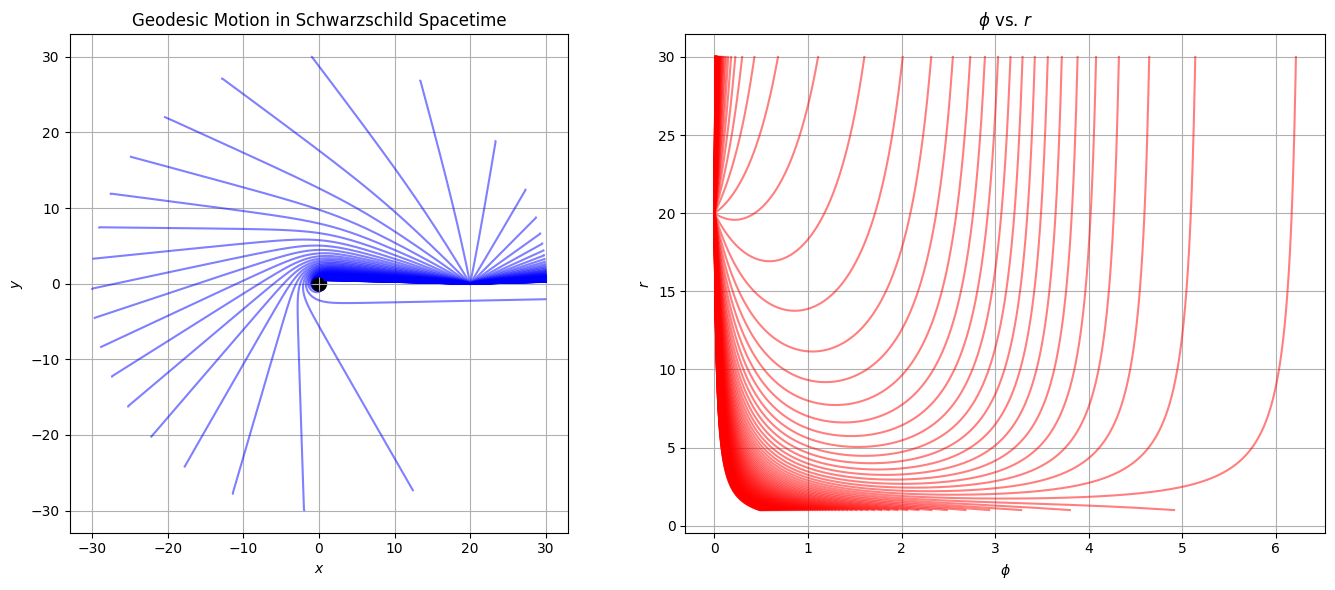

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rs = 1                                 # Schwarzschild black hole radius (= 2GM/c^2)
r_0 = 20                               # Initial radius
du_0_values = np.linspace(-2, 2, 200)  # Range of initial tangential velocities
phi_start = 0                          # Min value for phi angle
phi_max = 3 * np.pi                    # Max value for phi angle
h = 0.001                              # Step size for RK4
max_r = 30                             # Maximum allowed radius before coliding with env map

def geodesic(u):
    return -u * (1 - (3 / 2) * rs * u)

def schwarzschild_func(phi, u):
    return [u[1], geodesic(u[0])]

def rk4_step(func, t, y, h):
    k1 = np.array(func(t, y))
    k2 = np.array(func(t + 0.5 * h, y + 0.5 * k1 * h))
    k3 = np.array(func(t + 0.5 * h, y + 0.5 * k2 * h))
    k4 = np.array(func(t + h, y + k3 * h))
    
    return y + (k1 + 2*k2 + 2*k3 + k4) * h / 6

# Init plots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].set_title('Geodesic Motion in Schwarzschild Spacetime')
axs[0].set_xlabel(r'$x$')
axs[0].set_ylabel(r'$y$')
axs[0].grid()
circle = plt.Circle((0, 0), rs, color='black', label='Central Mass')
axs[0].add_artist(circle)

axs[1].set_title(r'$\phi$ vs. $r$')
axs[1].set_xlabel(r'$\phi$')
axs[1].set_ylabel(r'$r$')
axs[1].grid()

# Raytracing
u_0 = 1 / r_0
for du_0 in du_0_values:
    initial_conditions = np.array([u_0, du_0])

    phi_values = np.arange(phi_start, phi_max, h)

    u_du_values = np.zeros((len(phi_values), 2))
    u_du_values[0] = initial_conditions

    # Perform RK4 integration
    reached_max_r = False
    for i in range(1, len(phi_values)):
        phi = phi_values[i - 1]
        y = u_du_values[i - 1]

        if 1 / y[0] >= max_r:
            u_du_values[i - 1] = [1/max_r, 0]
            phi_values[i] = phi_values[i - 1]
            reached_max_r = True
            break

        u_du_values[i] = rk4_step(schwarzschild_func, phi, y, h)

    u_values = u_du_values[:, 0]
    r_values = 1 / u_values

    valid_indices = np.where(r_values >= rs)[0]

    invalid_mask = r_values < rs
    if np.any(invalid_mask):  
        first_invalid_index = np.argmax(invalid_mask)
        valid_indices = valid_indices[valid_indices < first_invalid_index]

    r_values = r_values[valid_indices]
    phi_values = phi_values[valid_indices]

    x_values = r_values * np.cos(phi_values)
    u_du_values = r_values * np.sin(phi_values)

    axs[0].plot(x_values, u_du_values, color='blue', alpha=0.5)
    axs[0].set_aspect('equal', adjustable='box')

    axs[1].plot(phi_values, r_values, color='red', alpha=0.5)

plt.tight_layout()
plt.show()